# MLP 


In [96]:
import numpy as np
import scipy.io as spio

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, precision_recall_fscore_support


from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [97]:
#Converting rgb images to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [98]:
def formatArray(data):
    im = []
    for i in range(0, data.shape[3]):
        im.append(rgb2gray(data[:, :, :, i]))
    return np.asarray(im)

In [99]:
#Updating labels (Replace 10 in labels with 0)

def fixLabel(labels):
    labels[labels == 10] = 0
    return labels

# Load training and test data

In [100]:
mat1 = spio.loadmat('train_32x32.mat', squeeze_me=True)    
mat2 = spio.loadmat('test_32x32.mat', squeeze_me=True)
train_images=mat1['X']
train_labels=mat1['y']
test_images=mat2['X']
test_labels=mat2['y']


test_images.shape

(32, 32, 3, 26032)

In [6]:
train_images.shape

(32, 32, 3, 73257)

In [34]:
test_images.shape

(26032, 32, 32)

In [33]:
train_labels.shape

(73257,)

In [101]:
#Specify class labels

class_names = ['0','1', '2', '3', '4', '5','6', '7', '8', '9']

# Convert to proper format

In [102]:
train_images=formatArray(train_images)
test_images=formatArray(test_images)
train_labels=fixLabel(train_labels)
test_labels=fixLabel(test_labels)

In [60]:
train_images.shape   # X_train


(73257, 32, 32)

In [61]:
train_labels.shape  # y_train


(73257,)

In [59]:
test_images.shape    #X_test

(26032, 32, 32)

In [58]:

test_labels.shape   #  Y_test

(26032,)

In [103]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [104]:
# Configuration options
# Reshape to 32 x 32 pixels = 1024 features
feature_vector_length = 1024
num_classes = 10

X_train = train_images.reshape(train_images.shape[0], feature_vector_length)
X_test = test_images.reshape(test_images.shape[0],feature_vector_length)

In [65]:
X_train.shape

(73257, 1024)

In [66]:
X_test.shape

(26032, 1024)

In [105]:
# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [68]:
X_train.shape

(73257, 1024)

In [69]:
X_test.shape

(26032, 1024)

In [107]:
# One-hot encoding of train and test labels  

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [79]:
Y_train=train_labels.shape

In [75]:
test_labels.shape

(26032, 10)

In [108]:
# Set the input shape
input_shape = (feature_vector_length)
print(f'Feature shape: {input_shape}')

Feature shape: 1024


In [109]:
# Create the model
model = Sequential()
model.add(Dense(350, input_shape=(1024,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [110]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
history=model.fit(X_train, train_labels, epochs=10, batch_size=128, verbose=1, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58605/58605 [==============================] - 5s 84us/sample - loss: 2.2394 - acc: 0.1879 - val_loss: 2.1957 - val_acc: 0.1875
Epoch 2/10
58605/58605 [==============================] - 5s 78us/sample - loss: 2.0040 - acc: 0.2562 - val_loss: 1.7561 - val_acc: 0.4017
Epoch 3/10
58605/58605 [==============================] - 5s 80us/sample - loss: 1.6228 - acc: 0.4455 - val_loss: 1.4967 - val_acc: 0.5020
Epoch 4/10
58605/58605 [==============================] - 5s 79us/sample - loss: 1.3975 - acc: 0.5387 - val_loss: 1.3334 - val_acc: 0.5821
Epoch 5/10
58605/58605 [==============================] - 5s 79us/sample - loss: 1.2479 - acc: 0.6050 - val_loss: 1.2301 - val_acc: 0.6137
Epoch 6/10
58605/58605 [==============================] - 5s 79us/sample - loss: 1.1658 - acc: 0.6356 - val_loss: 1.1484 - val_acc: 0.6525
Epoch 7/10
58605/58605 [==============================] - 5s 80us/sample - loss: 1.1043 - acc: 0.6577 - val_loss: 1.

In [112]:
# Evaluate train and validation accuracies and losses

train_acc = history.history['acc']
val_acc = history.history['val_acc']

train_loss = history.history['loss']
val_loss = history.history['val_loss']



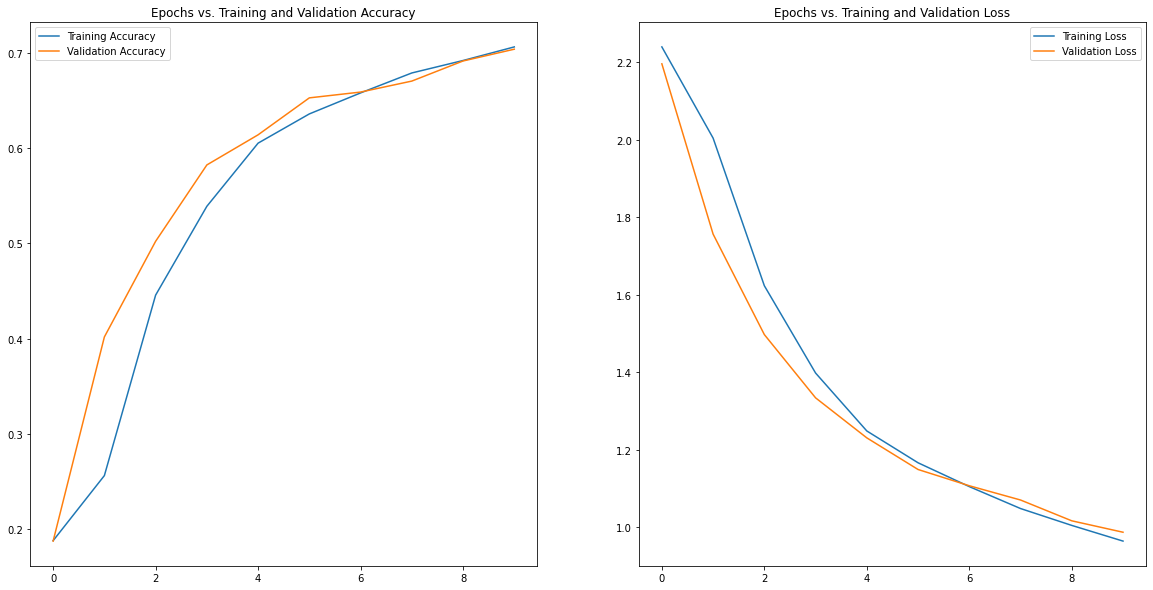

In [113]:
# Visualize epochs vs. train and validation accuracies and losses

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 350)               358750    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                17550     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 376,810
Trainable params: 376,810
Non-trainable params: 0
_________________________________________________________________


In [114]:
# Test the model after training
test_results = model.evaluate(X_test, test_labels, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

26032/26032 [==============================] - 2s 67us/sample - loss: 1.0919 - acc: 0.6772
Test results - Loss: 1.0919289090696405 - Accuracy: 0.6771665811538696%


# Confusion Matrix

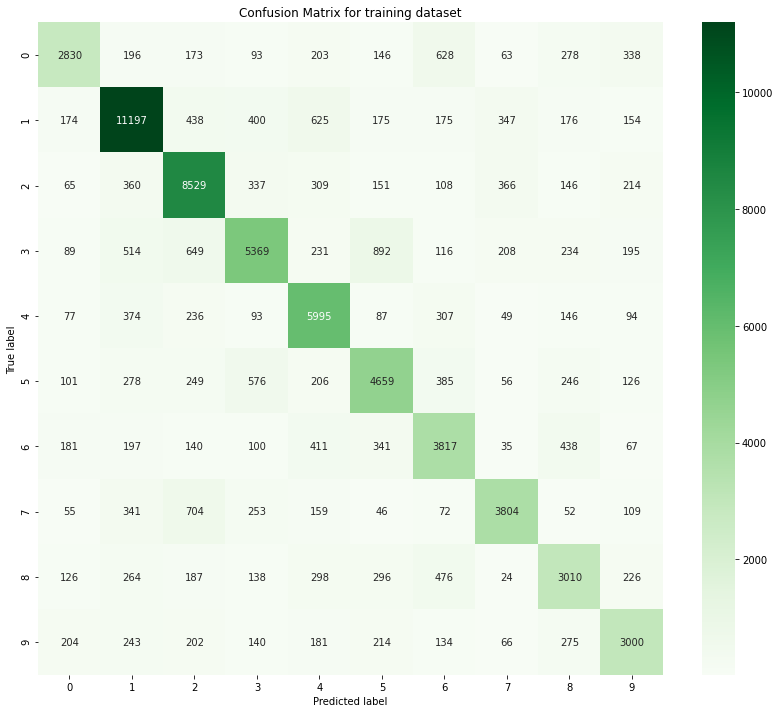

In [115]:
y_pred = model.predict(X_train)
y_pred = lb.inverse_transform(y_pred, lb.classes_)
y_train = lb.inverse_transform(train_labels, lb.classes_)

matrix = confusion_matrix(y_train, y_pred, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [141]:
from sklearn.metrics import classification_report


print(classification_report(y_train, y_pred, target_names=class_names))



              precision    recall  f1-score   support

           0       0.73      0.57      0.64      4948
           1       0.80      0.81      0.80     13861
           2       0.74      0.81      0.77     10585
           3       0.72      0.63      0.67      8497
           4       0.70      0.80      0.75      7458
           5       0.66      0.68      0.67      6882
           6       0.61      0.67      0.64      5727
           7       0.76      0.68      0.72      5595
           8       0.60      0.60      0.60      5045
           9       0.66      0.64      0.65      4659

    accuracy                           0.71     73257
   macro avg       0.70      0.69      0.69     73257
weighted avg       0.71      0.71      0.71     73257

